# Customer Satisfaction Survey Data Analysis

#### **TEAM 6**
1. Manav Gupta (Team Leader)
2. Yuvraj Chopra
3. Nistha Goel
4. Vidhi Bhardwaj

### Importing Required Packages

In [778]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing The Dataset

In [780]:
import pandas as pd

def read_csv_file(file_path):
    try:
        data = pd.read_csv(file_path)
        
        print(f"Successfully loaded data from '{file_path}'")
        print(f"Number of rows: {data.shape[0]}")
        print(f"Number of columns: {data.shape[1]}")
        
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{file_path}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: The file '{file_path}' could not be parsed.")

file_path = 'Customer-survey-data.csv'
survey_data = read_csv_file(file_path)
survey_data

Successfully loaded data from 'Customer-survey-data.csv'
Number of rows: 10616
Number of columns: 5


,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


The dataset contains 10,616 entries with responses from customers regarding their satisfaction with the delivery experience, food quality, speed of delivery, and order accuracy at Kashmir Cafe. The data can provide valuable insights into the key areas of customer satisfaction.

Columns Description:
1. **Customer:** A unique identifier for each customer (1 to 10,616).
2. **How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied:** A rating scale for delivery experience.
3. **How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied:**  A rating scale from 1 to 5 assessing the quality of food
4. **How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied:** A rating scale from 1 to 5 evaluating how fast the delivery was.
5. **Was your order accurate? Please respond yes or no.:** A categorical response of Yes or No, indicating whether the order matched what was requested.

## Cleaning The Dataset

Starting with renaming the columns

In [784]:
survey_data.rename(columns={
    'Customer': 'customer_id',
    'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery_rating',
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'food_rating',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'deliveryspeed_rating',
    'Was your order accurate? Please respond yes or no.': 'accuracy_rating'
}, inplace=True)

survey_data.head()


,customer_id,delivery_rating,food_rating,deliveryspeed_rating,accuracy_rating
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


Finding any missing/null/na values in the dataset and filling it with a mean value.

In [786]:
def check_na_values(df):
    na_count = df.isna().sum().sum()
    if na_count > 0:
        print(f"There are {na_count} missing values in the dataset.")
        print(df.isna().sum())
    else:
        print("There are no missing values in the dataset.")

In [787]:
check_na_values(survey_data)

There are 1569 missing values in the dataset.
customer_id               0
delivery_rating         418
food_rating             252
deliveryspeed_rating    239
accuracy_rating         660
dtype: int64


In [788]:
survey_data['delivery_rating'] = survey_data['delivery_rating'].fillna(survey_data['delivery_rating'].mean())
survey_data['food_rating'] = survey_data['food_rating'].fillna(survey_data['food_rating'].mean())
survey_data['deliveryspeed_rating'] = survey_data['deliveryspeed_rating'].fillna(survey_data['deliveryspeed_rating'].mean())

In [789]:
check_na_values(survey_data)

There are 660 missing values in the dataset.
customer_id               0
delivery_rating           0
food_rating               0
deliveryspeed_rating      0
accuracy_rating         660
dtype: int64


Dropping the values with missing values in accuracy_rating.

In [791]:
survey_data = survey_data.dropna(subset=['accuracy_rating'])
check_na_values(survey_data)

There are no missing values in the dataset.


Changing the values inside accuracy_rating to '0s' and '1s' as 'Yes' and 'No' are inaccurate way of representing the data.

In [793]:
survey_data.dtypes

customer_id               int64
delivery_rating         float64
food_rating             float64
deliveryspeed_rating    float64
accuracy_rating          object
dtype: object

In [794]:
print(survey_data['accuracy_rating'].unique())

['Yes' 'No']


In [795]:
survey_data.loc[:, 'accuracy_rating'] = survey_data['accuracy_rating'].astype(str).apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
survey_data.dtypes

customer_id               int64
delivery_rating         float64
food_rating             float64
deliveryspeed_rating    float64
accuracy_rating          object
dtype: object

In [796]:
survey_data['accuracy_rating'].unique()

array([1, 0], dtype=object)

## Saving The Transformed Data For Loading The Data To Snowflake

In [798]:
survey_data.to_csv('transformed_data.csv', index=False)

## Analysing The Data

delivery_rating 

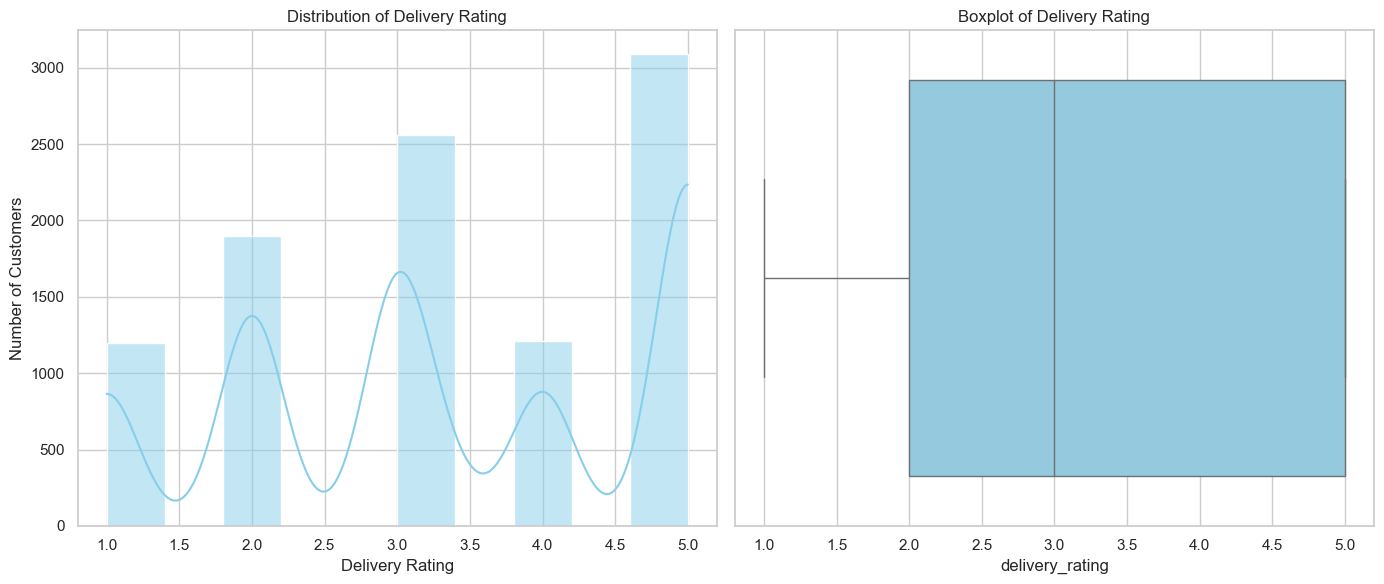

In [801]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(survey_data['delivery_rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Delivery Rating')
plt.xlabel('Delivery Rating')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x=survey_data['delivery_rating'], color='skyblue')
plt.title('Boxplot of Delivery Rating')

plt.tight_layout()
plt.show()


food_quality_rating

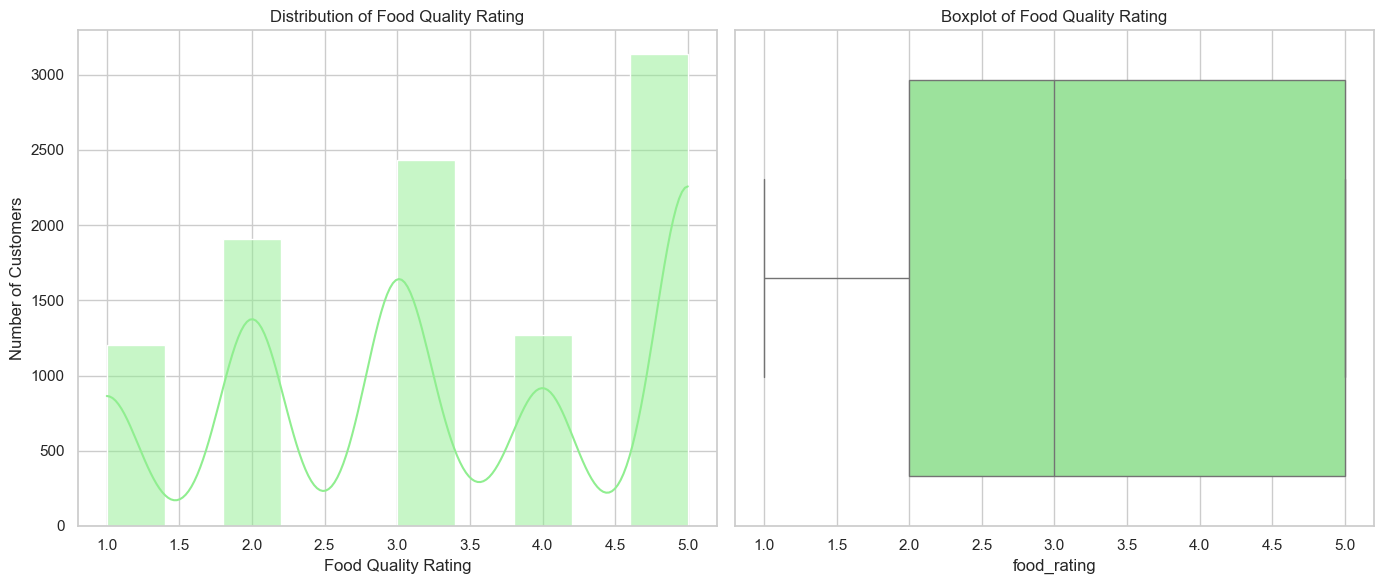

In [803]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(survey_data['food_rating'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Food Quality Rating')
plt.xlabel('Food Quality Rating')
plt.ylabel('Number of Customers')


plt.subplot(1, 2, 2)
sns.boxplot(x=survey_data['food_rating'], color='lightgreen')
plt.title('Boxplot of Food Quality Rating')

plt.tight_layout()
plt.show()


delivery_speed_rating

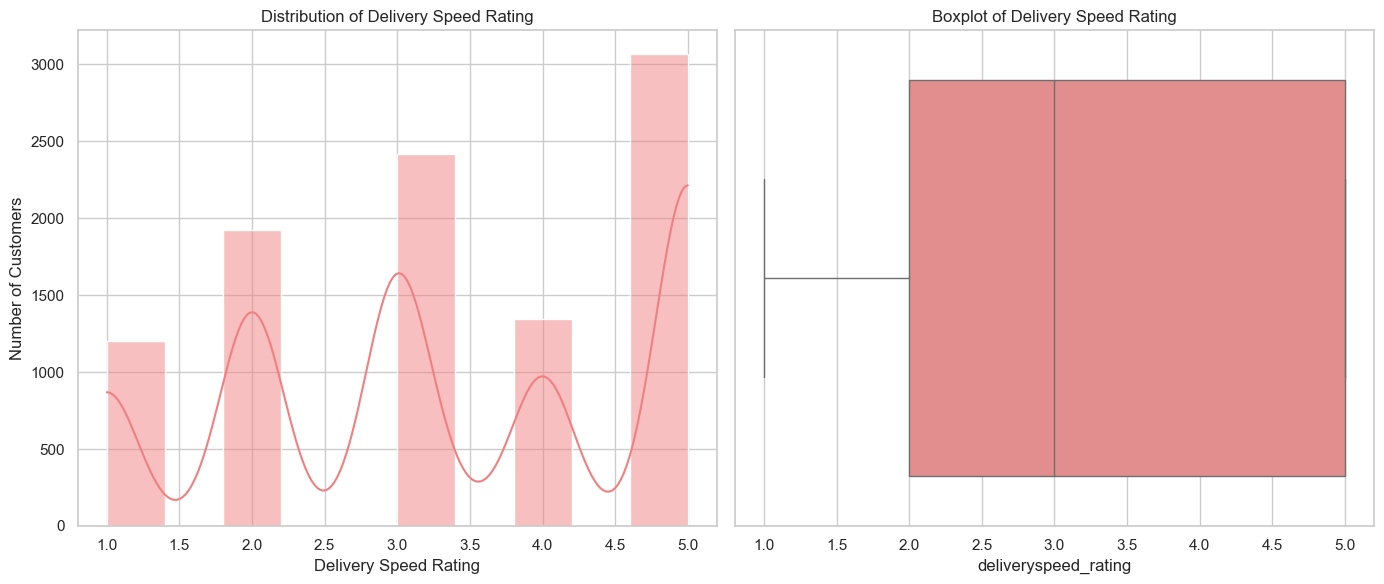

In [805]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(survey_data['deliveryspeed_rating'], bins=10, kde=True, color='lightcoral')
plt.title('Distribution of Delivery Speed Rating')
plt.xlabel('Delivery Speed Rating')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x=survey_data['deliveryspeed_rating'], color='lightcoral')
plt.title('Boxplot of Delivery Speed Rating')

plt.tight_layout()
plt.show()

accuracy_rating

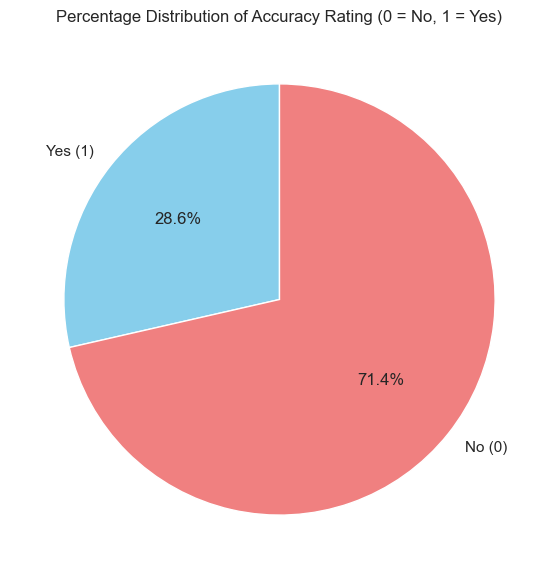

In [807]:
accuracy_counts = survey_data['accuracy_rating'].value_counts().sort_index()
accuracy_labels = ['Yes (1)', 'No (0)']

plt.figure(figsize=(7, 7))
plt.pie(accuracy_counts, labels=accuracy_labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Percentage Distribution of Accuracy Rating (0 = No, 1 = Yes)')
plt.show()


## Analyzing Data 

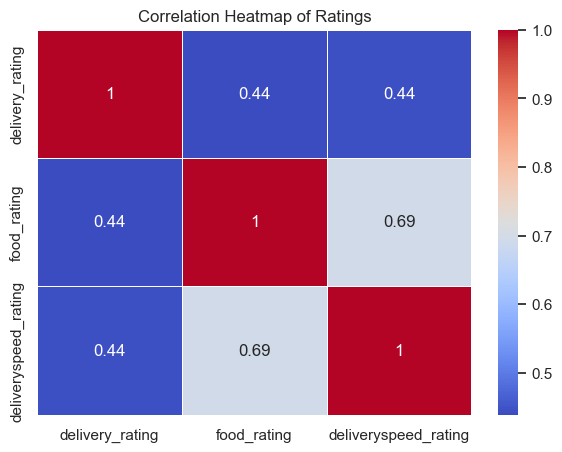

In [809]:
rating_columns = ['delivery_rating', 'food_rating', 'deliveryspeed_rating']

correlation_matrix = survey_data[rating_columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Ratings')
plt.show()

This heatmap displays the correlation between three variables: ```delivery_rating```, ```food_rating```, and ```deliveryspeed_rating```. Here’s an analysis of the correlations:

1. Delivery Rating and Food Rating (0.44): There’s a moderate positive correlation of 0.44 between ```delivery_rating``` and ```food_rating```. This indicates that as delivery ratings increase, food ratings also tend to increase, though not very strongly.

2. Food Rating and Delivery Speed Rating (0.69): The strongest correlation is between ```food_rating``` and ```deliveryspeed_rating``` at 0.69, suggesting a significant positive relationship. Higher food ratings are generally associated with better delivery speed ratings.

3. Delivery Rating and Delivery Speed Rating (0.44): Similar to the first pair, there is a moderate positive correlation of 0.44 between ```delivery_rating``` and ```deliveryspeed_rating```. This implies that higher delivery ratings tend to align with higher delivery speed ratings, but the relationship is not particularly strong.

In [842]:
survey_data.loc[:, 'satisfaction_rating'] = survey_data[['delivery_rating', 'food_rating', 'deliveryspeed_rating']].mean(axis=1)
survey_data

,customer_id,delivery_rating,food_rating,deliveryspeed_rating,accuracy_rating,satisfaction_rating
0,1,5.0,3.0,4.0,1,4.000000
1,2,3.0,4.0,3.0,1,3.333333
2,3,4.0,5.0,2.0,1,3.666667
3,4,5.0,3.0,4.0,1,4.000000
4,5,2.0,5.0,1.0,1,2.666667
...,...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,1,3.000000
10612,10613,3.0,3.0,3.0,1,3.000000
10613,10614,5.0,3.0,3.0,1,3.666667
10614,10615,3.0,3.0,3.0,1,3.000000


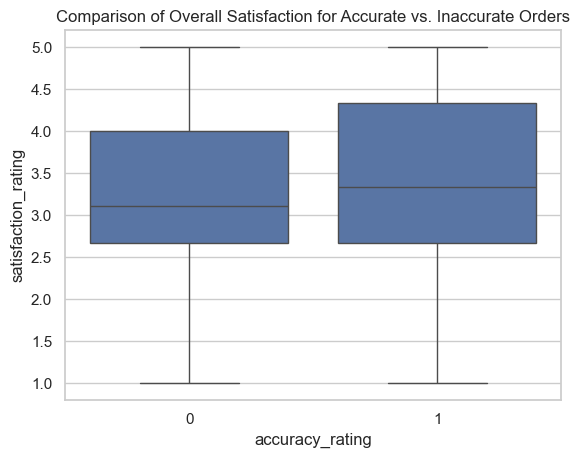

In [812]:
sns.boxplot(x='accuracy_rating', y='satisfaction_rating', data=survey_data)
plt.title('Comparison of Overall Satisfaction for Accurate vs. Inaccurate Orders')
plt.show()

The plot indicates that order accuracy has a slight positive impact on satisfaction ratings, but it is not the sole determinant.

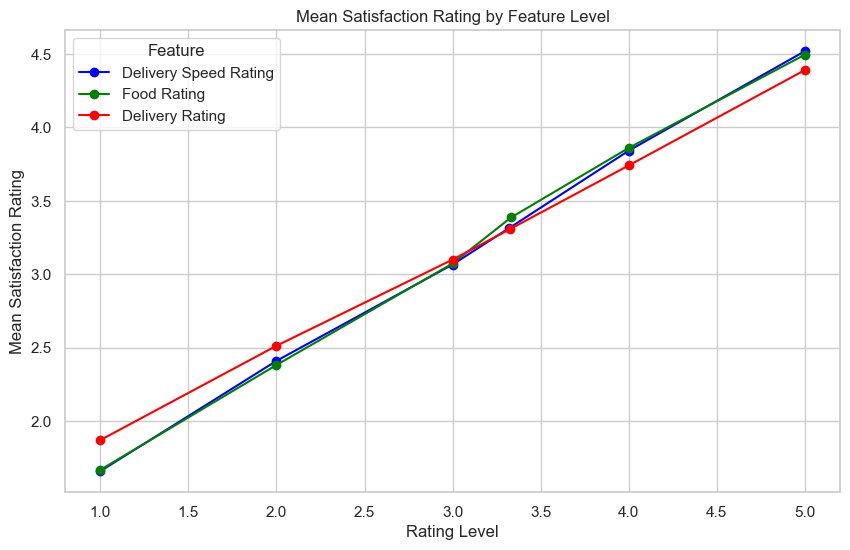

In [814]:
mean_satisfaction_deliveryspeed = survey_data.groupby('deliveryspeed_rating')['satisfaction_rating'].mean()
mean_satisfaction_food = survey_data.groupby('food_rating')['satisfaction_rating'].mean()
mean_satisfaction_delivery = survey_data.groupby('delivery_rating')['satisfaction_rating'].mean()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

mean_satisfaction_deliveryspeed.plot(kind='line', marker='o', ax=ax, label="Delivery Speed Rating", color='blue')

mean_satisfaction_food.plot(kind='line', marker='o', ax=ax, label="Food Rating", color='green')

mean_satisfaction_delivery.plot(kind='line', marker='o', ax=ax, label="Delivery Rating", color='red')

ax.set_title("Mean Satisfaction Rating by Feature Level")
ax.set_xlabel("Rating Level")
ax.set_ylabel("Mean Satisfaction Rating")
ax.legend(title="Feature")

plt.show()


The graph show the relationship between the average satisfaction_rating and the levels of three rating features: deliveryspeed_rating (blue line), food_rating (green line), and delivery_rating (red line). Here’s an analysis:

1. Positive Correlation with Satisfaction: All three ratings (deliveryspeed_rating, food_rating, and delivery_rating) show a clear positive trend with satisfaction_rating. As each individual rating increases, the mean satisfaction rating also increases. This suggests that higher scores in each of these areas are associated with higher overall satisfaction.

2. Similar Slopes Across Features: The lines for all three features follow a similar upward trend, indicating that they all have a comparable effect on the satisfaction_rating. This means that improvements in any of these areas are likely to result in higher satisfaction.

3. Slight Differences in Importance:
- Delivery Speed (Blue): This line is slightly higher than the others at the upper end, indicating that customers may weigh delivery speed slightly more when evaluating their overall satisfaction.
- Food Quality (Green): The food_rating line is also closely associated with satisfaction, especially at the higher rating levels. This indicates that food quality is another strong contributor to satisfaction.
- Delivery Experience (Red): While still positively correlated with satisfaction, delivery_rating is slightly lower than the other two at certain points. This aligns with previous observations where delivery experience was slightly less important than delivery speed and food quality.

In [816]:
from sklearn.ensemble import RandomForestRegressor

X = survey_data[['delivery_rating', 'food_rating', 'deliveryspeed_rating']]
y = survey_data['satisfaction_rating']


model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


                Feature  Importance
2  deliveryspeed_rating    0.448249
1           food_rating    0.371967
0       delivery_rating    0.179785


```deliveryspeed_rating```: This feature has the highest importance score (0.448), meaning that delivery speed has the most significant influence on the overall satisfaction rating. This indicates that customers place a high value on the speed of delivery, and improving this aspect could have a substantial impact on overall satisfaction.

```food_rating```: The next most important feature (0.372), suggesting that food quality is also a strong contributor to satisfaction. While less impactful than delivery speed, food quality still plays a significant role.

```delivery_rating```: This feature has the lowest importance score (0.180), indicating that the delivery experience itself is less important to overall satisfaction compared to delivery speed and food quality.

## Recommendations Based On The Findings

#### 1. Enhance Delivery Speed
Since ```deliveryspeed_rating``` is the highest contributor to overall satisfaction, optimizing delivery routes and ensuring timely deliveries can increase satisfaction levels. Investing in route optimization software or using predictive analytics to plan deliveries more efficiently could yield significant improvements.

#### 2.  Prioritize Accuracy in Orders
Since, almost 1 in 3 customers receives an inaccurate order, this issue is likely a major contributor to dissatisfaction. Even if satisfaction ratings increase with delivery speed, food quality, and delivery experience, inaccuracies can significantly damage the overall customer experience. Consider implementing a quality control process at the order fulfillment stage, such as double-checking orders before dispatch.

#### 3. Focus on Food Quality Standards
```food_rating``` is also a significant driver of customer satisfaction. Maintaining high food quality is crucial. Regularly monitor food preparation standards, freshness of ingredients, and temperature control during transit.